<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/LSTM_example_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# LSTM for international airline passengers problem with regression framing
# Predicting the s
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(42)

# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X = t and Y = t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Training in progress ...

1/1 [==============================] - 0s 24ms/step
Train Score: 0.06 RMSE
Test Score: 0.12 RMSE


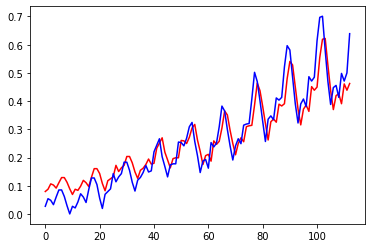

In [4]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

print("Training in progress ...")
print("")

# This will be for later 
old_trainY = trainY 

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=0)

# make predictions
trainPredict = model.predict(trainX);
testPredict = model.predict(testX);

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

plt.plot(trainPredict,'r')
plt.plot(trainY,'b')
plt.show()





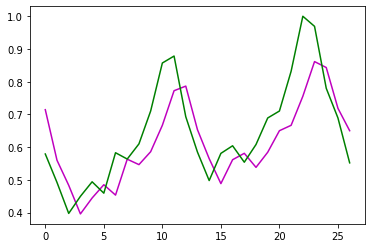

In [ ]:
plt.plot(testPredict,'m')
plt.plot(testY,'g')
plt.show()

Training in progress ...

1/1 [==============================] - 0s 21ms/step
Train Score: 0.05 RMSE
Test Score: 0.10 RMSE


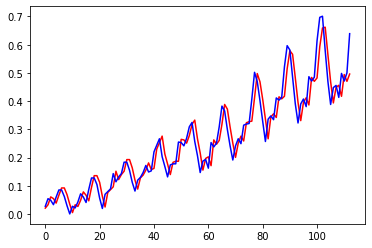

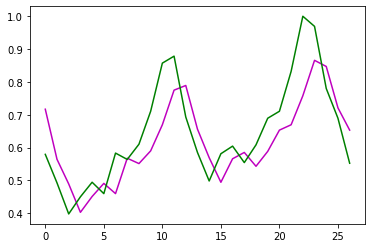

In [ ]:
# create and fit the RNN looking at the previous examples

